In [1]:
push!(LOAD_PATH, "..")
using ASE
using MatSciPy
using PyPlot
using PyCall
using TightBinding
import NRLTB

# displacement of one atom
δ = 0.2
# temperature
TEMPE = 300


300

In [5]:

at = bulk("Al"; cubic=true)
at = repeat(at, (4, 4, 1))
set_pbc!(at, [true, true, true])
Xref = positions(at)

tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (4,4,8)
TightBinding.update_eF!(at, tbm)

# #plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
# #plot3D(X[1,1:1], X[2,1:1], X[3,1:1], "ro")
println(length(at))
println(cell(at));

64
[16.2 0.0 0.0
 0.0 16.2 0.0
 0.0 0.0 4.05]


In [6]:
# move one atom and test the force
X = copy(Xref); X[1,1] += δ
set_positions!(at, X)

# one needs to compute Fermi-level again
# K, E = TightBinding.band_structure(at, tbm)
tbm.fixed_eF = true
tbm.smearing.beta = TEMPE
# TightBinding.update_eF!(at, tbm)

frc1 = TightBinding.forces(at, tbm)

3x64 Array{Float64,2}:
 -0.0492183    -0.000609343   0.0148025    …   0.000488177  0.00506205 
 -9.36436e-17  -0.000726466  -9.10293e-17      0.000516593  0.00456735 
  1.92375e-17  -3.08702e-17  -5.07132e-19     -1.35795e-18  8.09281e-18

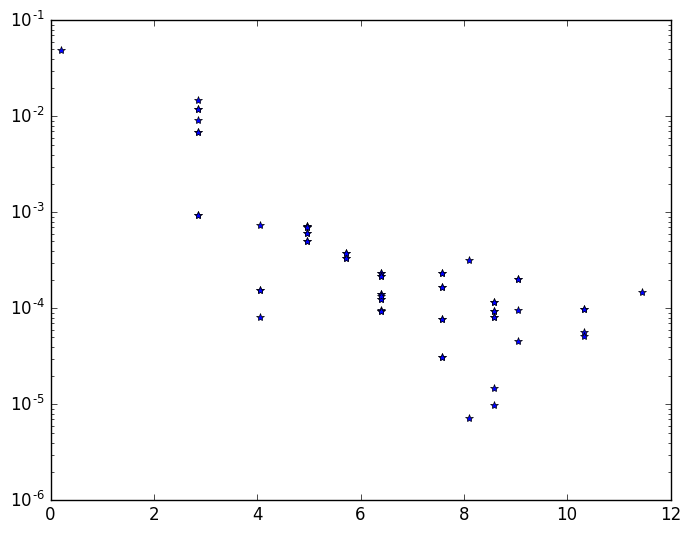

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x316dd2610>

In [7]:
L = cell(at)[1,1]

F = zeros(length(at))
Z = zeros(length(at))  # periodic distance

for j = 1:length(at)
    F[j] = norm(frc1[:,j])
    Z[j] = min( norm(X[:,j]), norm(X[:,j]-[L, 0, 0]), 
                norm(X[:,j]-[0, L, 0]), norm(X[:,j]-[0, 0, L]), 
                norm(X[:,j]-[0, L, L]), norm(X[:,j]-[L, 0, L]), 
                norm(X[:,j]-[L, L, 0]), norm(X[:,j]-[L, L, L]) )
end
semilogy(Z, F, "*")

In [31]:
# Now try to perturb all atoms randomly.
# =========================================
# construct a gaussian-like perturbation (a bit naive, but why not?!)
r0 = rnn("Al")
u = randn(3, length(at)) * r0 / 10;
u[:] = max(min(u[:], r0/5), - r0/5)
# compute forces in this state
X0 = Xref + u; set_positions!(at, X0)
f0 = TightBinding.forces(at, tbm)
# now perturb this state
X1 = copy(X0); X1[1,1] += delta
f1 = TightBinding.forces(at, tbm)
# compare f0 - f1





LoadError: LoadError: Base.LinAlg.PosDefException(3444)
while loading In[31], in expression starting on line 11